<a href="https://colab.research.google.com/github/it21303302b/DL_assignment/blob/main/IMDB_Movie_Review_Sentiment_Analysis_simpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.shape

(50000, 2)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [ ]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train_data.shape

(40000, 2)

In [ ]:
test_data.shape

(10000, 2)

# Data pre processing

In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [ ]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
Y_train

,sentiment
39087,0
30893,0
45278,1
16398,0
13653,0
...,...
11284,1
44732,1
38158,0
860,1


In [ ]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')  # Regex to match HTML tags
    return re.sub(clean, '', text)

def preprocess_text(text):
    text = remove_html_tags(text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    # Other cleaning steps like removing punctuation, etc.
    return text


# simpleRNN MODEL BUILDING

In [ ]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SimpleRNN(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:

model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6371 - loss: 0.6095 - val_accuracy: 0.8111 - val_loss: 0.4292
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8040 - loss: 0.4474 - val_accuracy: 0.5575 - val_loss: 0.6961
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6239 - loss: 0.6398 - val_accuracy: 0.6295 - val_loss: 0.6326
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6685 - loss: 0.5998 - val_accuracy: 0.6545 - val_loss: 0.6124
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.7011 - loss: 0.5643 - val_accuracy: 0.6655 - val_loss: 0.6013


model.summary()

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (64, 200, 128)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (64, 128)                   │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (64, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,019,077 (7.70 MB)

 Trainable params: 673,025 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,346,052 (5.13 MB)

In [ ]:
model.save("model.h5")

In [ ]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6626 - loss: 0.6006


In [ ]:
print(loss)

0.6042173504829407


In [ ]:
print(accuracy)

0.6636000275611877


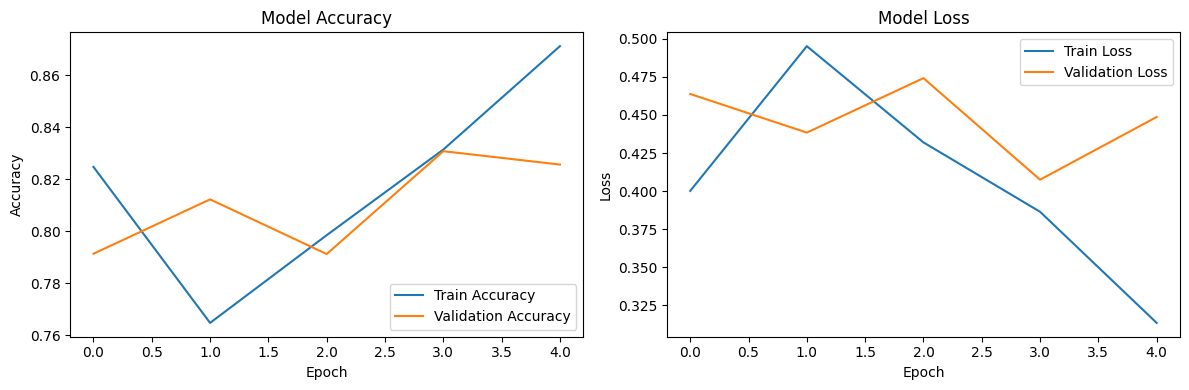

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Building Predictive System

In [ ]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


'positive'

In [ ]:
predictive_system("A trilling adventure with stunning visual")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'positive'

In [ ]:
predictive_system("A visual masterpiece")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'positive'

In [ ]:
predictive_system("Overall long and slow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'negative'

In [ ]:
predictive_system("don't like the plot")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'negative'

In [ ]:
predictive_system("eww.. what is this? crappy movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'negative'

In [ ]:
predictive_system("worst movie ever")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'negative'